Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.017447948455810547
MSE:  3.379725327885091
Коэффициенты:  [5.80518315 0.92326374 2.27986501 3.06482532 3.99258943 5.05943499]


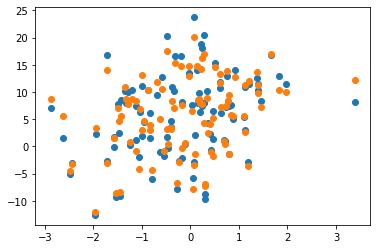

In [3]:
X = np.random.randn(100, 5)
y = X @ np.array([1, 2, 3, 4, 5]) + np.random.randn(100) * 2 + 6

start_time = time.time()
modelGD = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelGD.predict(X)
print("MSE: ", modelGD.MSE(X, y))
print("Коэффициенты: ", modelGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

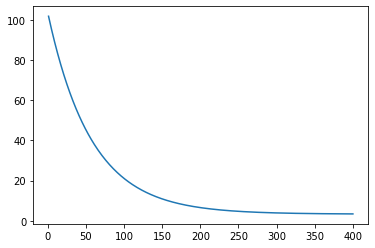

In [4]:
fig = plt.plot(steps, errors)

In [5]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # размер мини-батча 
        self.batch_size = batch_size  
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
        self.regularization = regularization
        self.alpha = alpha
         
    def fit(self, X, y):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        grad = X.T @ (X @ self.theta - y) / len(y)
        if self.regularization == 'l1':
            grad += self.alpha * np.sign(self.theta)
        elif self.regularization == 'l2':
            grad += 2 * self.alpha * self.theta
        elif self.regularization == 'elasticnet':
            grad += self.alpha * self.theta + (1 - self.alpha) * np.sign(self.theta)
        return grad
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

Время обучения: 0.008029460906982422
MSE:  3.2715155434607883
Коэффициенты:  [5.9581516  0.95429486 2.34572228 3.23767934 4.06904021 5.22419489]


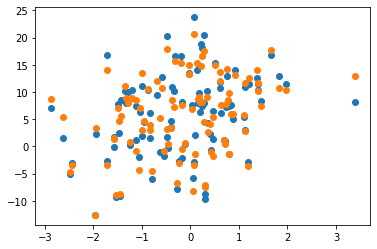

In [6]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.01, max_iter=50, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(X, y)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
y_pred = modelSGD.predict(X)
print("MSE: ", np.mean((y_pred - y) ** 2))
print("Коэффициенты: ", modelSGD.theta)
plt.scatter(X[:,2], y)
plt.scatter(X[:,2], y_pred)

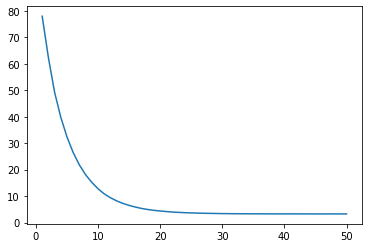

In [7]:
fig = plt.plot(steps, errors)

In [8]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)
    
    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)
    
    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))
    
    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]
    
    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]
    
    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]
    
    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

In [9]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# Создание нового столбца, содержащего целевую переменную 'y' 
# (количественный показатель прогрессирования заболевания
# через год после исходного уровня)
df['diabetes_measure'] = diabetes.target
X = df.iloc[:,:-1].values # Определение признаков
y = df.iloc[:,-1].values # Определение целевой переменной
print(df.head())
# Разделение данных на обучающие и тестовые наборы
x_train, y_train, x_test, y_test = train_test_split_(X, y, test_size = 0.3, random_state = 123) 
# Подготовка данных для применения линейной регрессии
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train)) # Добавление столбца с единицами к обучающим данным
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test)) # Добавление столбца с единицами к тестовым данным


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019908 -0.017646             151.0  
1 -0.039493 -0.068330 -0.092204              75.0  
2 -0.002592  0.002864 -0.025930             141.0  
3  0.034309  0.022692 -0.009362             206.0  
4 -0.002592 -0.031991 -0.046641             135.0  


Реализуем L2-регуляризацию с помощью прямых вычислений:
\begin{align}w &= (X^TX + \lambda I_d)^{-1}X^Ty\end{align}

l, MSE_test - MSE_train:
1e-20 99.60532251958193
2.5353644939701167e-20 99.60532251958193
6.428073117284345e-20 99.60532251958193
1.6297508346206402e-19 99.60532251958193
4.1320124001153346e-19 99.60532251958193
1.0476157527896661e-18 99.60532251958193
2.6560877829466947e-18 99.60532251958193
6.734150657750801e-18 99.60532251958193
1.7073526474706886e-17 99.60532251958193
4.328761281083062e-17 99.60532251958193
1.097498765493059e-16 99.60532251957966
2.782559402207126e-16 99.60532251958148
7.054802310718631e-16 99.60532251957966
1.788649529057435e-15 99.60532251958057
4.534878508128591e-15 99.6053225195792
1.1497569953977357e-14 99.60532251957602
2.9150530628251696e-14 99.60532251957284
7.390722033525775e-14 99.60532251956283
1.8738174228603867e-13 99.60532251953691
4.750810162102794e-13 99.60532251946552
1.2045035402587836e-12 99.60532251929817
3.0538555088334124e-12 99.60532251886752
7.742636826811278e-12 99.60532251777795
1.9630406500402685e-11 99.60532251500854
4.977023564332114e-1

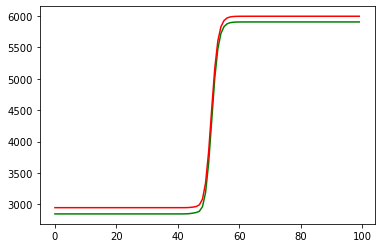

In [10]:
# Подготовка к вычислению регуляризации и построению графиков
train_scores, test_scores = [], []
id = np.eye(x_train.shape[1]+1)
id[0][0] = 0
print("l, MSE_test - MSE_train:")
# Обучение модели с различными значениями параметра регуляризации и оценка ее качества
for l in np.logspace(-20, 20, 100):
    w = np.linalg.inv(x_train1.T @ x_train1 + l*id) @ x_train1.T @ y_train # Вычисление весов модели
    # Оценка среднеквадратичной ошибки на обучающем и тестовом наборах
    MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
    train_scores.append(MSE_train)
    MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
    test_scores.append(MSE_test)
    print(l, MSE_test - MSE_train)
plt.plot(train_scores, 'g') # График среднеквадратичной ошибки на обучающем наборе (зеленый цвет)
plt.plot(test_scores, 'r') # График среднеквадратичной ошибки на тестовом наборе (красный цвет)

start_time = time.time() # Засекаем время начала обучения модели
# Вычисление весов модели линейной регрессии с регуляризацией
w = np.linalg.inv(x_train1.T @ x_train1 + 0.038*id) @ x_train1.T @ y_train
MSE_train = (y_train - x_train1 @ w).T @ (y_train - x_train1 @ w)/ x_train1.shape[0]
MSE_test = (y_test - x_test1 @ w).T @ (y_test - x_test1 @ w)/ x_test1.shape[0]
print("Время обучения:", time.time() - start_time)
print("MSE_train, MSE_test", MSE_train, MSE_test)
print("Коэффициенты: ", w)
print("np.linalg.det(x_train.T @ x_train): ", np.linalg.det(x_train1.T @ x_train1))
print("np.linalg.det(x_train.T @ x_train + 0.43287*id): ", np.linalg.det(x_train1.T @ x_train1 + 0.43287*id))

Время обучения: 0.22944164276123047
MSE_train:  3060.373485640746
MSE_test:  3187.08646560202
Коэффициенты:  [ 152.69077714   42.40003462  -97.23685054  374.87420067  217.48475471
   -7.98703838  -39.08044106 -191.96067315  161.10079227  284.13538688
  158.81094408]


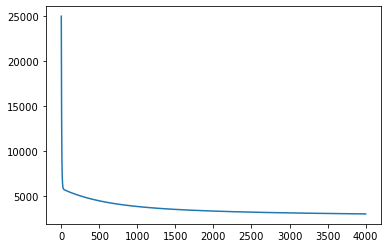

In [11]:
start_time = time.time()
modelGD = LinearRegressionGD(lr=0.1, max_iter=4000, tol=1e-3, intercept = True)
steps, errors = modelGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelGD.theta)
plt.plot(steps, errors)

Время обучения: 0.1321725845336914
MSE_train:  2874.4609628426965
MSE_test:  2959.60001488648
Коэффициенты:  [ 151.54919828   13.48021606 -242.17979114  533.74603458  266.90566414
  -74.58982618 -117.81123411 -206.82436788  169.24660125  390.33197463
  120.62395727]


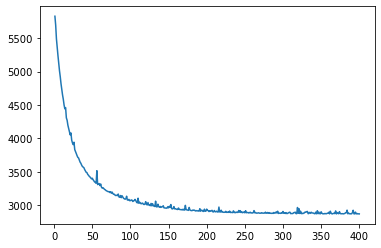

In [12]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=400, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 11.836442947387695
MSE_train:  2849.011855855992
MSE_test:  2952.8675760651913
Коэффициенты:  [ 154.02481144    9.47190624 -261.29242025  540.26642715  275.24723531
 -810.88978447  441.83478072  135.58266152  294.83303718  669.60045235
  101.81403851]


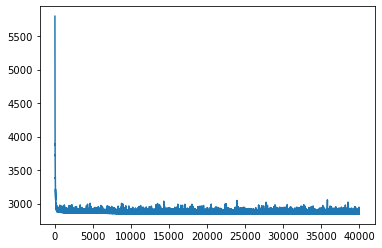

In [13]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=8, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Время обучения: 4.202653408050537
MSE_train:  2852.267371300491
MSE_test:  2948.1222231535207
Коэффициенты:  [ 151.66732572   12.01094548 -259.01774853  545.44619426  272.59457248
 -501.54639352  193.24751893    3.30485912  262.40232093  553.34987629
  102.03661913]


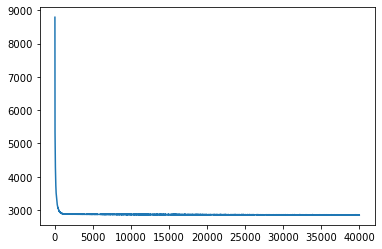

In [14]:
start_time = time.time()
modelSGD = LinearRegressionSGD(lr=0.1, max_iter=40000, batch_size=32, tol=1e-3, intercept = True)
steps, errors = modelSGD.fit(x_train, y_train)
print("Время обучения:", time.time() - start_time)
# Predict using predict method from model
print("MSE_train: ", modelSGD.MSE(x_train, y_train))
print("MSE_test: ", modelSGD.MSE(x_test, y_test))
print("Коэффициенты: ", modelSGD.theta)
plt.plot(steps, errors)

Видим, что у стохастического градиентного спуска качество выше, разрыв в качестве на обучающей и тестовой выборке меньше, время выполнения меньше, и чем у обычного градиентного спуска, и чем у прямых вычислений с L2-регуляризацией! При этом стохастический градиентный спуск работает более "шумно". Многое зависит и от оптимального подбора размера мини-батча.



<b>Домашнее задание</b>

Объясните, почему коэффициенты всех построенных моделей сильно отличаются между собой.

Сравните скорость и качество обучения моделей регрессии с помощью обычного и стохастического градиентного спуска на наборе данных housing.csv.

1. Разные методы обучения модели:

В вашем коде используются два разных метода для обучения модели линейной регрессии: LinearRegressionGD и LinearRegressionSGD. Различия в алгоритмах оптимизации, таких как градиентный спуск и стохастический градиентный спуск, могут привести к различиям в полученных коэффициентах.

2. Разные параметры обучения:

Вы обучаете модели с различными параметрами, такими как max_iter (максимальное количество итераций), batch_size (размер пакета для стохастического градиентного спуска), и tol (условие остановки). Разные значения этих параметров могут повлиять на то, как быстро и точно модель сходится к оптимальным коэффициентам.

3. Использование регуляризации:

Ваш код также включает регуляризацию с разными значениями параметра регуляризации (переменная l в цикле for). Разные значения параметра регуляризации могут приводить к различным весам модели, особенно при наличии большого шкалирования значений l.

4. Случайная инициализация:

Некоторые методы могут использовать случайную инициализацию коэффициентов модели, что может привести к различным значениям при разных запусках.

Подберите в цикле оптимальное, с Вашей точки зрения, значение размера мини-батча и поясните Ваш выбор.

Реализуйте в классе LinearRegressionSGD стохастический градиентный спуск с регуляризацией L1, L2, ElasticNet и подберите оптимальные параметры регуляризации, чтобы сократить разрыв качества на обучающей и тестовой выборке.